<a href="https://colab.research.google.com/github/gmdeorozco/California-Housing-Prices-ML-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## California Housing Prices Regression

Welcome to the California Housing Prices Regression Jupyter Notebook! In this notebook, we will explore the process of predicting housing prices in California using different regression algorithms. Regression is a powerful machine learning technique used for predicting continuous numeric values, making it an ideal approach for real estate price estimation.

### The Code

This notebook focuses on implementing a basic regression pipeline using scikit-learn, a popular machine learning library in Python. The code performs the following key steps:




1. **Data Loading**: We start by loading the California Housing dataset using scikit-learn's `fetch_california_housing` function. This dataset contains various features related to housing districts in California, and our goal is to predict the corresponding housing prices (the target variable).

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = load_boston()
X, y = data.data, data.target

ImportError: ignored

In [43]:
# Data preprocessing: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
# Convert X into a pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)
X_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [45]:
# Convert y into a pandas DataFrame
y_df = pd.Series(y, name='Target')
y_df.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

In [47]:
df = pd.concat([X_scaled, y_df], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


MedInc      0.688075
AveRooms    0.151948
HouseAge    0.105623
Name: Target, dtype: float64


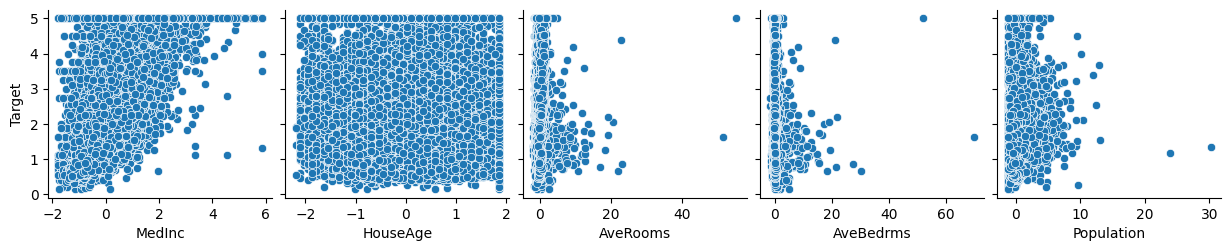

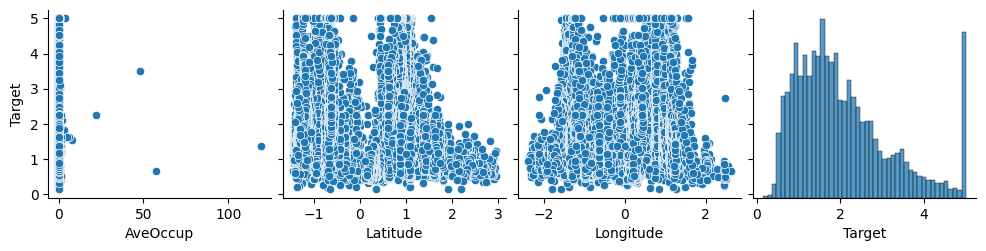

In [48]:

data_num = df.select_dtypes(include = ['float64', 'int64'])
data_corr = data_num.corr()['Target'][:-1]
top_features = data_corr[ abs(data_corr > 0)].sort_values(ascending=False)
print(top_features)

for d in range(0, len(data_num.columns), 5):
  sns.pairplot(data= data_num,
               x_vars= data_num.columns[d:d+5],
               y_vars=['Target'])


### Looking for Correlations

2. **Data Preprocessing**: We briefly discuss the importance of data preprocessing, including handling missing values, feature scaling, and normalization. While the California Housing dataset is relatively clean, this section serves as a reminder to address data preprocessing in more complex scenarios.

In [6]:
# Data preprocessing (if needed)



3. **Train-Test Split**: To evaluate the performance of our regression models, we split the dataset into training and testing subsets using `train_test_split`. The training set is used to train the regression model, while the testing set will assess its performance on unseen data.



In [3]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. **Linear Regression Model**: We create a Linear Regression model using scikit-learn's `LinearRegression` class. The model is trained on the training data using the `fit` method.


In [4]:

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

5. **Prediction and Evaluation**: With the trained Linear Regression model, we make predictions on the test set using the `predict` method. We then evaluate the model's performance using two common regression metrics: Mean Squared Error (MSE) and R-squared (R2).

In [5]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.5558915986952422
R-squared: 0.5757877060324524
